# Plot object features for different CSLs

In [1]:
from campa.tl import Experiment, FeatureExtractor
from campa.pl import hex2rgb
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

In [3]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
extrs = {data_dir: FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation.h5ad')) 
    for data_dir in exp.data_params['data_dirs']}

In [5]:
adata = ad.concat([extr.adata for extr in extrs.values()], index_unique='-', uns_merge='same')

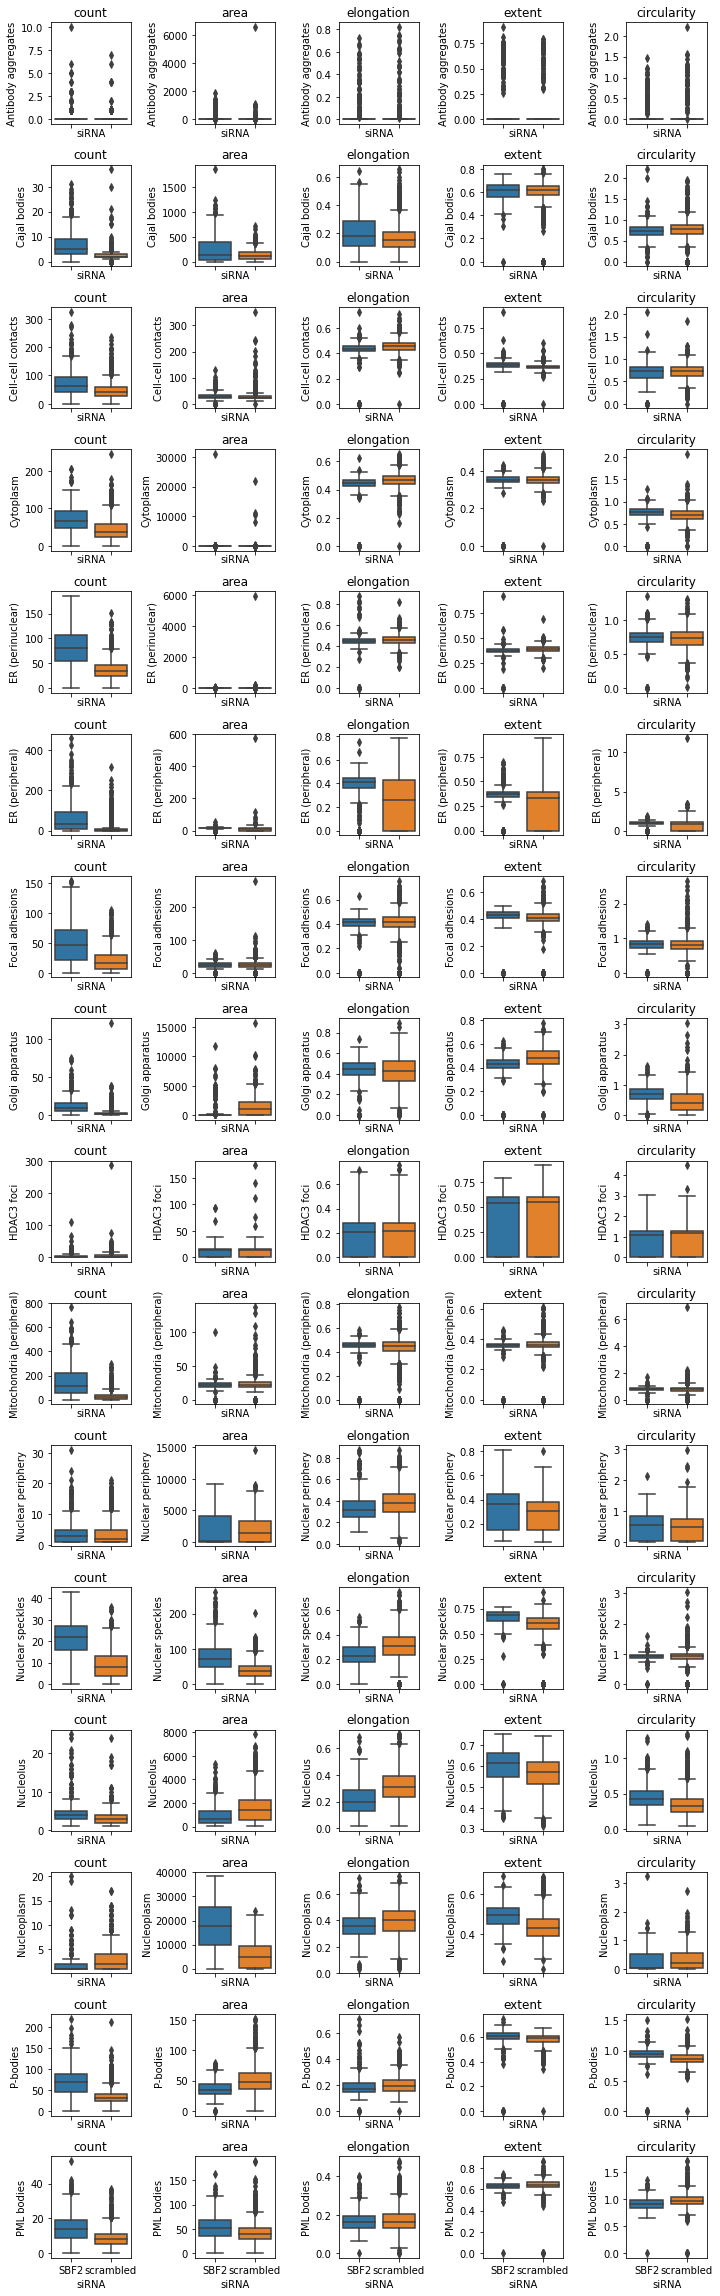

In [11]:
def plot_object_features(adata, group_key, features=None, agg='median'):
    if features is None:
        features = ['count', 'area', 'elongation', 'extent', 'circularity']
    clusters = adata.uns['clusters']
    fig, axes = plt.subplots(len(clusters), len(features), figsize=(len(features)*2, len(clusters)*2), sharex=True)
    for cl, row in enumerate(axes):
        for i, ax in enumerate(row):
            f = f'object_{features[i]}'
            if features[i] != 'count':
                f = f'{f}_{agg}'
            df = adata.obsm[f].copy()
            df[group_key] = adata.obs[group_key]
            sns.boxplot(data=df, y=clusters[cl], x=group_key, ax=ax)
            ax.set_title(features[i])
    plt.tight_layout()
plot_object_features(adata, 'siRNA')
